In [1]:
# Import package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
os.makedirs("../data", exist_ok=True)

!wget -qO ../data/temp.zip "https://assets.datacamp.com/production/repositories/3202/datasets/9c670a495912949de0166c3ce690bad536ccf621/chapter_2.zip"
!unzip -qo ../data/temp.zip -d ../data
!rm -rf ../data/__MACOSX ../data/temp.zip

In [2]:
# Analyze key statistics
datamart_rfm = pd.read_csv("../data/datamart_rfm.csv", index_col=0)
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


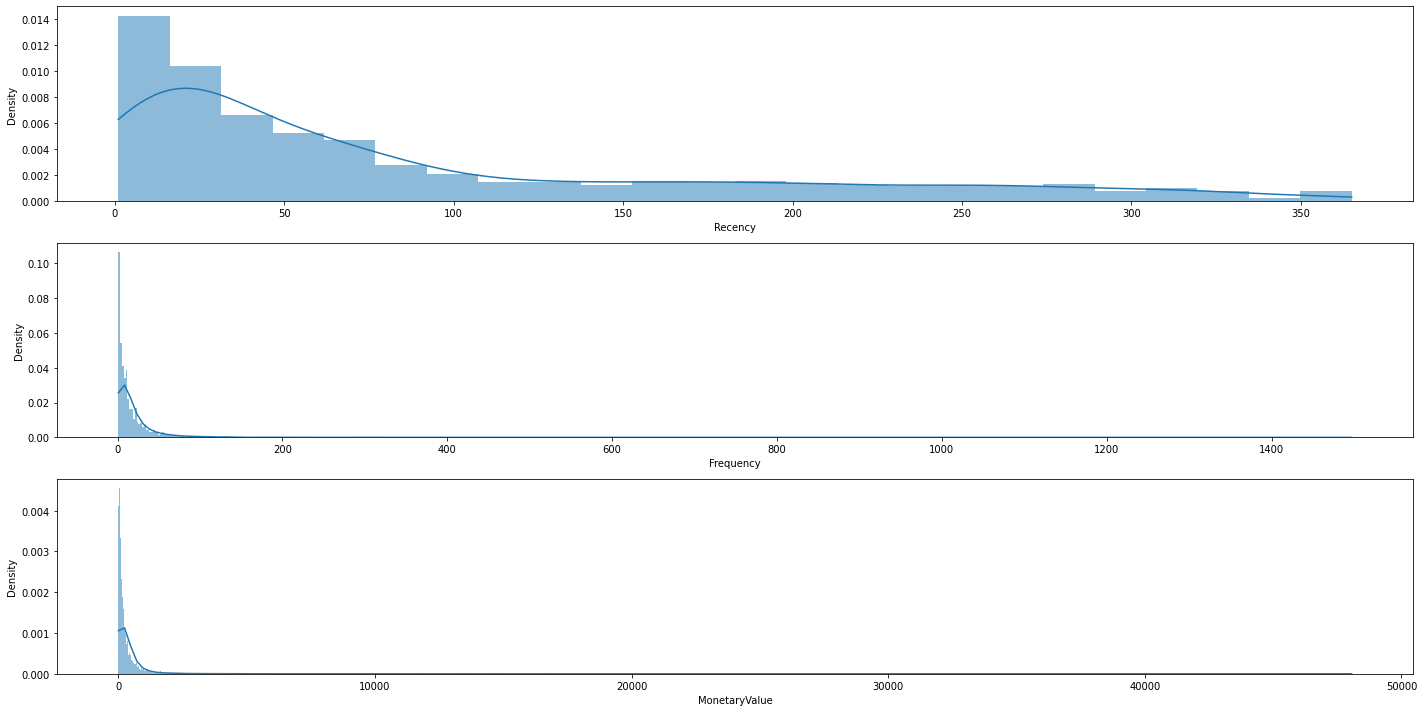

In [3]:
# Visual analysis of the distribution
# Exploring distribution of variables
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.histplot(datamart_rfm['Recency'], kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 2)
sns.histplot(datamart_rfm['Frequency'], kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 3)
sns.histplot(datamart_rfm['MonetaryValue'], kde=True, stat="density", 
    linewidth=0)

plt.tight_layout()
plt.show()

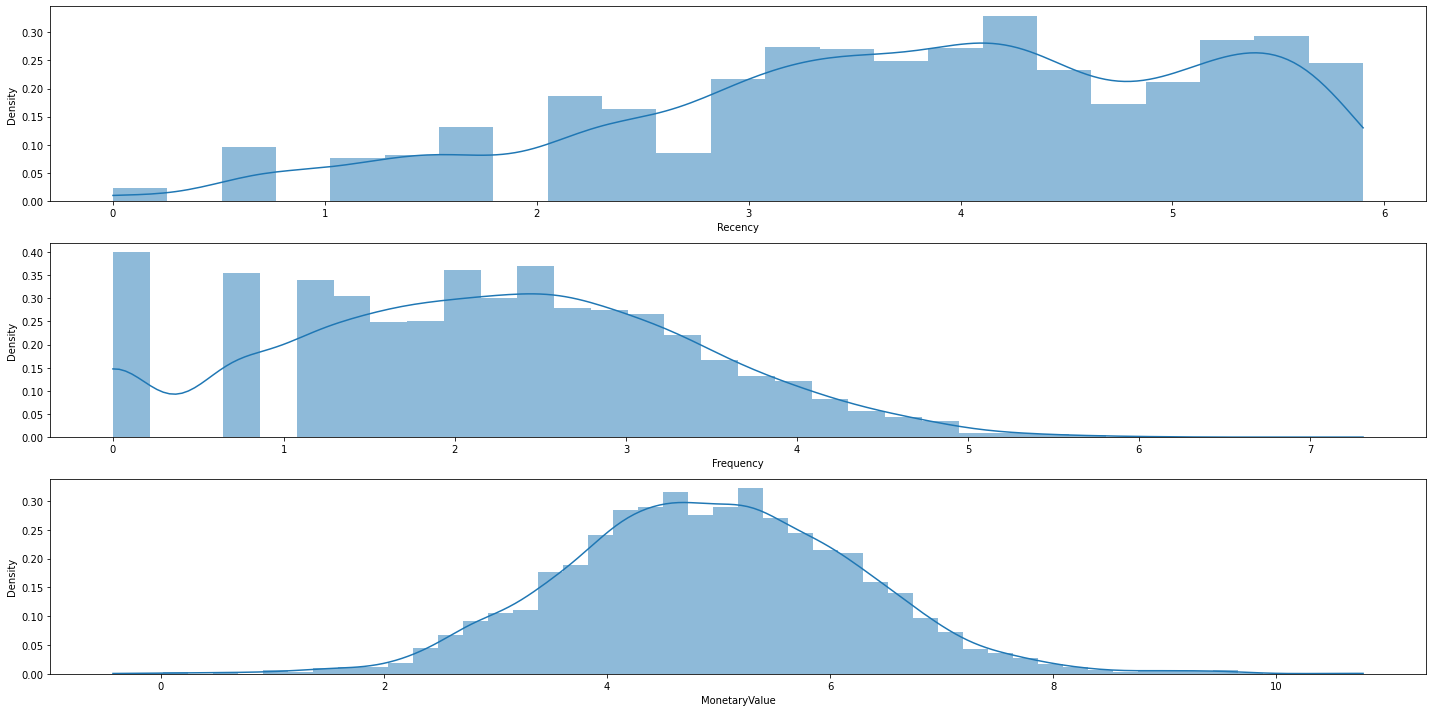

In [4]:
# Managing skewed variables
# Logarithmic transformation (positive values only)
# Add a constant before log transformation if negative values

# Exploring distribution of transformed recency
Recency_log = np.log(datamart_rfm['Recency'])
Frequency_log = np.log(datamart_rfm['Frequency'])
MonetaryValue_log = np.log(datamart_rfm['MonetaryValue'])

# Exploring distribution of variables
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.histplot(Recency_log, kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 2)
sns.histplot(Frequency_log, kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 3)
sns.histplot(MonetaryValue_log, kde=True, stat="density", 
    linewidth=0)

plt.tight_layout()
plt.show()

In [8]:
# Normalize by applying both centering & scaling
datamart_normalized = (datamart_rfm- datamart_rfm.mean())/datamart_rfm.std()
# Analyze key statistics
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.95,-0.40,-0.27
25%,-0.76,-0.34,-0.23
50%,-0.42,-0.22,-0.17
75%,0.51,0.05,-0.03
max,2.91,33.79,35.39


In [13]:
# Normalize by StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
datamart_normalized = pd.DataFrame(datamart_normalized, 
    index=datamart_rfm.index, columns=datamart_rfm.columns)
# Analyze key statistics
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.95,-0.40,-0.27
25%,-0.76,-0.34,-0.23
50%,-0.42,-0.22,-0.17
75%,0.51,0.05,-0.03
max,2.91,33.79,35.40


In [3]:
# Pre-processing pipeline
# 1. Unskew the data - log transformation
datamart_log = np.log(datamart_rfm)
# 2. Normalize the variables - equal mean, standard deviation
scaler = StandardScaler()
scaler.fit(datamart_log)
# 3. Store for clustering
datamart_normalized = scaler.transform(datamart_log)
datamart_normalized = pd.DataFrame(data=datamart_normalized, 
    index=datamart_rfm.index, columns=datamart_rfm.columns)
# Analyze key statistics
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.81,-1.79,-4.09
25%,-0.64,-0.65,-0.66
50%,0.09,0.02,-0.01
75%,0.83,0.72,0.67
max,1.55,4.25,4.46


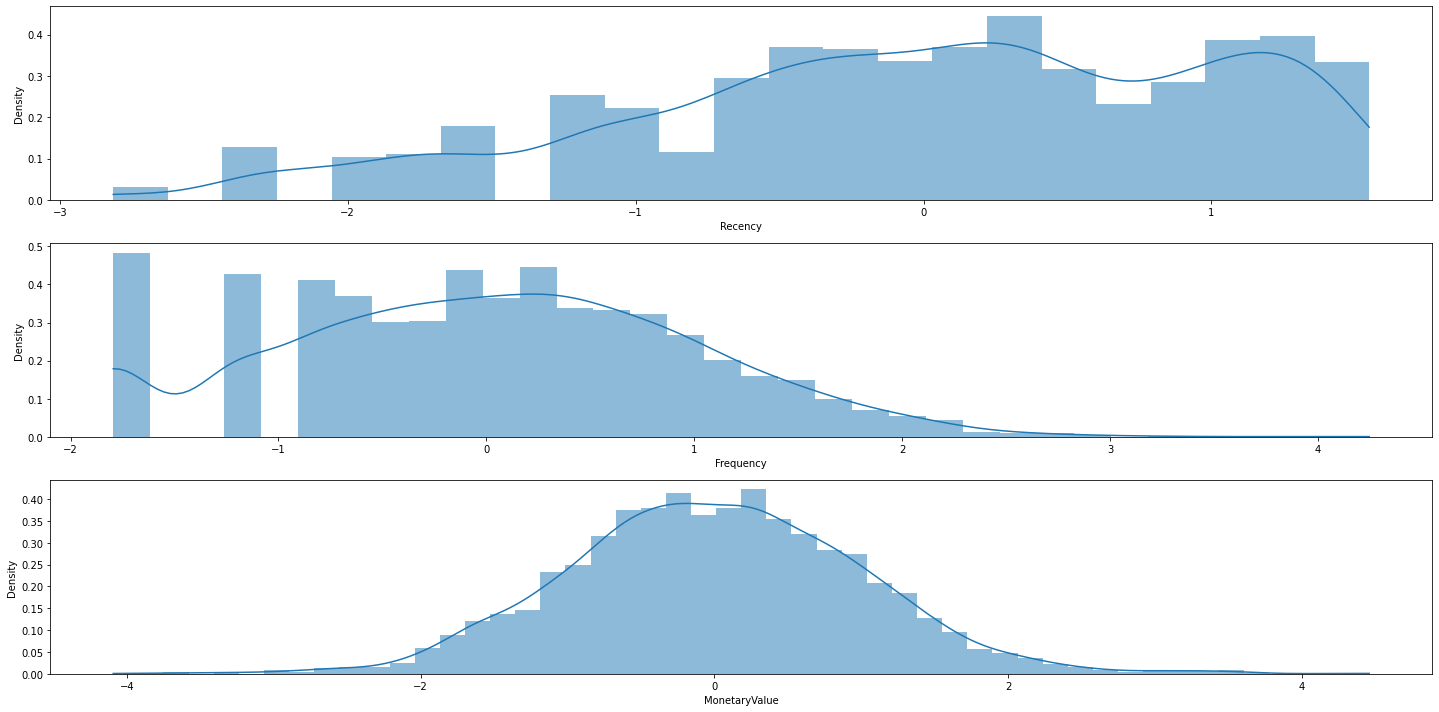

In [4]:
# Visual analysis of the distribution
# Exploring distribution of variables
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.histplot(datamart_normalized['Recency'], kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 2)
sns.histplot(datamart_normalized['Frequency'], kde=True, stat="density", 
    linewidth=0)

plt.subplot(3, 1, 3)
sns.histplot(datamart_normalized['MonetaryValue'], kde=True, stat="density", 
    linewidth=0)

plt.tight_layout()
plt.show()

In [3]:
# Data pre-processing
# 1. Unskew the data - log transformation
datamart_log = np.log(datamart_rfm)
# 2. Normalize the variables - equal mean, standard deviation
scaler = StandardScaler()
scaler.fit(datamart_log)
# 3. Store for clustering
datamart_normalized = scaler.transform(datamart_log)

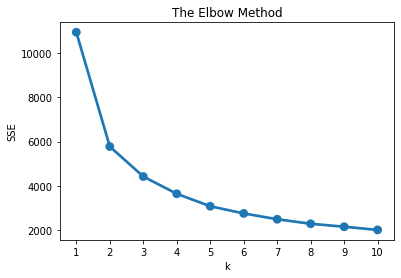

In [11]:
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 11):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    # Assign sum of squared distances to closest cluster center
    sse[k] = kmeans.inertia_
    
# Plot SSE for each k
# Add the plot title "The Elbow Method"
plt.title("The Elbow Method")
# Add X-axis label "k"
plt.xlabel('k');
# Add Y-axis label "SSE"
plt.ylabel('SSE')
# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [4]:
# Compute k-means clustering on pre-processed data
# Initialize K-means
kmeans = KMeans(n_clusters=3, random_state=1)
# Fit K-means clustering on the normalized data set
kmeans.fit(datamart_normalized)
# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)
# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.1      50.1        1050.6   901
1         166.6       3.0          53.0  1156
2          77.1      12.3         216.0  1586

In [15]:
# Compute k-means clustering on pre-processed data
# Initialize K-means
kmeans = KMeans(n_clusters=4, random_state=1)
# Fit K-means clustering on the normalized data set
kmeans.fit(datamart_normalized)
# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k4 = datamart_rfm.assign(Cluster=cluster_labels)
# Calculate average RFM values and segment sizes per cluster value
datamart_rfm_k4.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         129.4      11.8         231.3  1093
1          19.5      10.3         145.6   767
2          19.5      53.7        1129.3   836
3         165.5       2.6          44.1   947

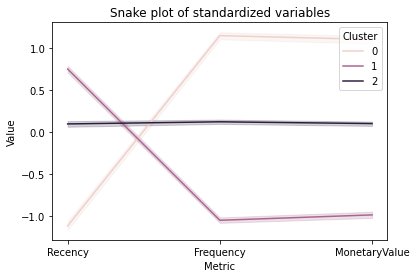

In [8]:
# Prepare data for a snake plot
# Transform datamart_normalized as DataFrame and add a Cluster column
datamart_normalized = pd.DataFrame(datamart_normalized,
    index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
# Melt the data so RFM values and metric names are stored in 1 column
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_normalized.reset_index(),
    id_vars=['CustomerID', 'Cluster'],
    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
    var_name='Metric',
    value_name='Value')
# Visualize a snake plot
# Add the plot title
plt.title('Snake plot of standardized variables')
# Plot a line for each value of the cluster variable
sns.lineplot(x='Metric', y='Value', hue='Cluster', 
    data=datamart_melt)
plt.show()

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.82       1.68           1.83
1           0.84      -0.84          -0.86
2          -0.15      -0.34          -0.42


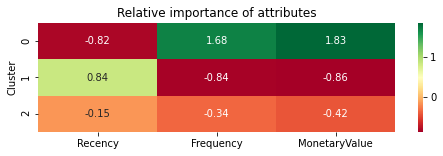

In [10]:
# Relative importance of segment attributes
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()
# Calculate relative importance of cluster's attribute value 
# compared to population
relative_imp = cluster_avg / population_avg - 1
# Analyze relative importance
# As a ratio moves away from 0, 
# attribute importance for a segment increases.
# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

# Plot heatmap
# Initialize a plot with a figure size of 8 by 2 inches
plt.figure(figsize=(8, 2))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()